# **Análisis conjunto de datos**

## *Parcial 1 Fundamentos de analtica*

##### *Wilmar Murillo Carmona*
##### *Mariana Gomez Cardenas*


# Punto 1

# Instalación de yfinance con pip Install

In [67]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importación librerias

In [68]:
import yfinance as yf
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importación datos

In [69]:
df = yf.download('NVDA', "2020-01-01", "2022-04-01", auto_adjust=True)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,59.465298,59.754219,58.959687,59.754219,23753600
2020-01-03,58.556189,59.236147,58.307120,58.797787,20538400
2020-01-06,57.863783,59.096675,57.602259,59.044369,26263600
2020-01-07,59.328305,60.217484,58.877490,59.759193,31485600
2020-01-08,59.716859,60.284737,59.315857,59.871284,27710800


# Verificacion tipos de variables

In [70]:
df.info()

print('_'*40 )

df.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 567 entries, 2020-01-02 to 2022-03-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    567 non-null    float64
 1   High    567 non-null    float64
 2   Low     567 non-null    float64
 3   Close   567 non-null    float64
 4   Volume  567 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 26.6 KB
________________________________________


(567, 5)

## Verificación valores nulos

In [71]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

## Verificacion estadistica descriptiva

In [72]:
df.describe()

,Open,High,Low,Close,Volume
count,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,158.013495,161.017312,154.763924,158.039041,4.325154e+07
std,71.453728,73.062607,69.478585,71.258211,2.081505e+07
min,49.868581,52.320888,45.028759,48.946472,9.788400e+06
25%,104.042513,105.579643,102.616329,104.443928,2.718220e+07
50%,137.239078,138.915641,134.356574,136.358429,3.789000e+07
75%,210.684509,213.935186,207.164198,210.659546,5.487855e+07
max,334.724394,346.009358,319.934075,333.316284,1.463684e+08


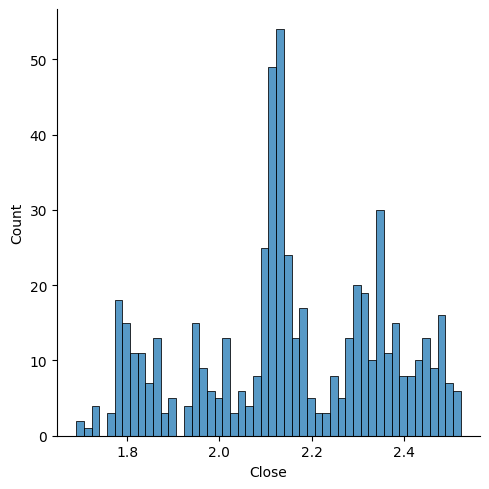

In [73]:
sns.displot(np.log10(df["Close"]), bins=50)

# **Verificacón de  correlacón entre variables**

In [74]:
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998936,0.998910,0.997490,-0.068817
High,0.998936,1.000000,0.998672,0.998860,-0.049418
Low,0.998910,0.998672,1.000000,0.998863,-0.082827
Close,0.997490,0.998860,0.998863,1.000000,-0.064375
Volume,-0.068817,-0.049418,-0.082827,-0.064375,1.000000


Verificación variables Open -  Close

________________________________________


,Open,Close
Open,1.00000,0.99749
Close,0.99749,1.00000


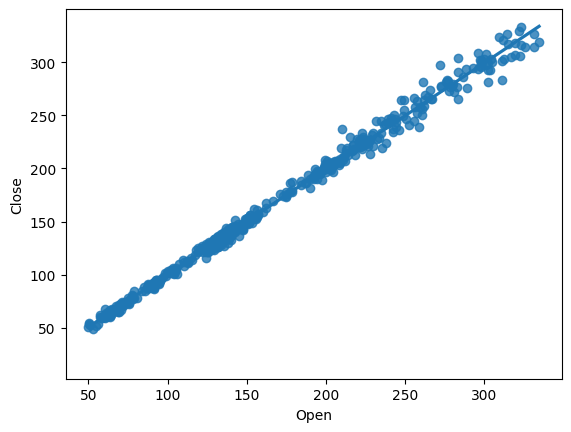

In [75]:
sns.regplot(x = "Open", y = "Close", data=df)
plt.ylim(2,)
print('_'*40)
df[["Open","Close"]].corr()

Verificación variables Close -  High

________________________________________


,High,Close
High,1.00000,0.99886
Close,0.99886,1.00000


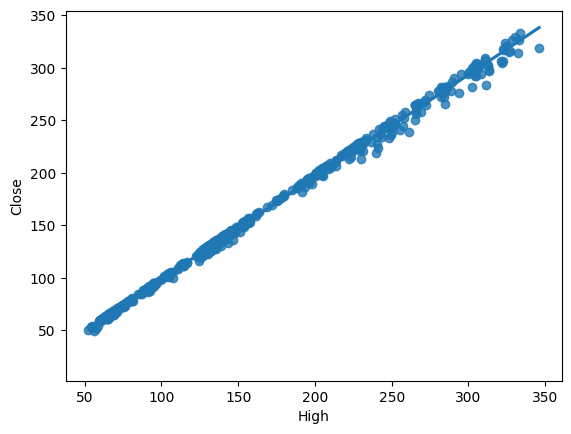

In [76]:
sns.regplot(x = "High", y = "Close", data=df)
plt.ylim(2,)
print('_'*40)
df[["High","Close"]].corr()

Verificación variables  Close -  Low

________________________________________


,Low,Close
Low,1.000000,0.998863
Close,0.998863,1.000000


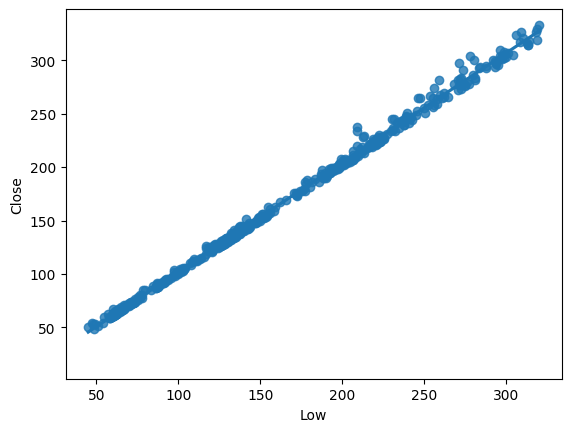

In [77]:
sns.regplot(x = "Low", y = "Close", data=df)
plt.ylim(2,)
print('_'*40)
df[["Low","Close"]].corr()

Verificación variabless Close  - Volume


________________________________________


,Volume,Close
Volume,1.000000,-0.064375
Close,-0.064375,1.000000


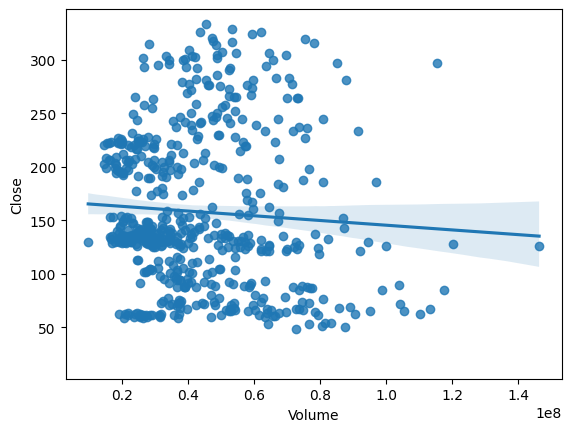

In [78]:
sns.regplot(x = "Volume", y = "Close", data=df)
plt.ylim(2,)
print('_'*40)
df[["Volume","Close"]].corr()

Se verifica la correlación de las variables y se toma la decisión de no ingresar al modelo  la variable **Volume**, debido a que su correlación es  de -0.04787 y consideramos que no es relevante para el modelo

# Modelo ML

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [81]:
Atribu = ["High","Low","Open"]
target = df.Close

In [82]:
X = df[Atribu]
y = target

In [102]:
X

,High,Low,Open
Date,,,
2020-01-02,59.754219,58.959687,59.465298
2020-01-03,59.236147,58.307120,58.556189
2020-01-06,59.096675,57.602259,57.863783
2020-01-07,60.217484,58.877490,59.328305
2020-01-08,60.284737,59.315857,59.716859
...,...,...,...
2022-03-25,283.285910,272.427187,278.570803
2022-03-28,282.207076,271.777899,277.272196
2022-03-29,289.159804,279.509818,286.652428


In [108]:
y

Date
2020-01-02     59.754219
2020-01-03     58.797787
2020-01-06     59.044369
2020-01-07     59.759193
2020-01-08     59.871284
                 ...    
2022-03-25    276.632843
2022-03-28    281.897400
2022-03-29    286.262817
2022-03-30    276.612854
2022-03-31    272.576996
Name: Close, Length: 567, dtype: float64

In [90]:
X_train, X_test, y_train, y_test = train_test_split (X,y, train_size= 0.8, random_state=20)

Modelo Rregresión Lineal

In [91]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

### Precisión del modelo

In [92]:
reg.score(X,y)

0.9990047169318587

In [93]:
print(reg.predict(X.head()))
print(df.Close.head())

[59.45001792 59.06965861 58.81165429 59.84273555 60.01449305]
Date
2020-01-02    59.754219
2020-01-03    58.797787
2020-01-06    59.044369
2020-01-07    59.759193
2020-01-08    59.871284
Name: Close, dtype: float64


In [94]:
y_pred =  reg.predict(X_test)

# Calculo de metricas

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def calcular_metricas(y_test, y_pred):
    '''
    y_test:- y verdaderos
    y_pred:- y predecidos
    '''
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scors = r2_score(y_test, y_pred)

    print("MSE:- ", mse)
    print("RMSE:- ", rmse)

In [98]:
calcular_metricas(y_test, y_pred)

MSE:-  3.049827018706664
RMSE:-  1.746375394554866


### Hacer test al modelo de predicción con nuevos datos

Creación de DataFrame ncon datos nuevos y predicción

In [107]:
df_1 = pd.DataFrame({"High": ["59.754219"], "Low":["58.959687"], "Open":["59.465298"]})
df_1

,High,Low,Open
0,59.754219,58.959687,59.465298


In [109]:
 pred = reg.predict(df_1)

In [110]:
print(pred)

[59.45001742]


Visualización de precisión modelo

In [113]:
score1=reg.score(X,y)
score1

0.9990047169318587

In [120]:
Columns = [score1*100]
rows = ["reg_model"]
data= pd.DataFrame(Columns,rows)
data

,0
reg_model,99.900472


# Conclusión

Se realiza la implementación del algoritmo ML para hacer la predicción de Close,  para esto se realizó la selección de las variables Open,High,Low, debido a que estas  tienen mayor correlación, la variable Volume se descarta por su baja correlación y sus datos tan dispersos, al final de crea el agoritmo dando como resultado el 99% de precisión, el cual se valida por medio de datos nuevos.